In [1]:
import pandas as pd
import numpy as np

In [2]:
data_df=pd.read_csv('titanic.csv')
data_df.describe()

,age,survived
count,756.000000,756.000000
mean,30.391534,0.414021
std,14.272565,0.492878
min,0.000000,0.000000
25%,21.000000,0.000000
50%,28.000000,0.000000
75%,39.000000,1.000000
max,71.000000,1.000000


In [3]:
data_df.head(3)

,name,pclass,age,sex,survived
0,"Hirvonen, Miss Hildur E",3rd,2,female,0
1,"Van Impe, Miss Catharine",3rd,10,female,0
2,"Sjostedt, Mr Ernst Adolf",2nd,59,male,0


In [4]:
encoded_df = pd.get_dummies(data_df, columns=['pclass'])
encoded_df.head()

,name,age,sex,survived,pclass_1st,pclass_2nd,pclass_3rd
0,"Hirvonen, Miss Hildur E",2,female,0,0,0,1
1,"Van Impe, Miss Catharine",10,female,0,0,0,1
2,"Sjostedt, Mr Ernst Adolf",59,male,0,0,1,0
3,"Fortune, Mr Mark",64,male,0,1,0,0
4,"Ware, Mr William J",23,male,0,0,1,0


In [5]:
encoded_df.sex=encoded_df.sex.replace({
    'male': 0,
    'female': 1
})
encoded_df.head(3)

,name,age,sex,survived,pclass_1st,pclass_2nd,pclass_3rd
0,"Hirvonen, Miss Hildur E",2,1,0,0,0,1
1,"Van Impe, Miss Catharine",10,1,0,0,0,1
2,"Sjostedt, Mr Ernst Adolf",59,0,0,0,1,0


In [6]:
# Drop unused columns
encoded_df.drop('name', axis=1, inplace=True)

# Create X/y arrays
X=encoded_df.drop('survived', axis=1).values
y=encoded_df.survived.values



In [23]:
from sklearn.tree import DecisionTreeClassifier

# Create basic model
dt = DecisionTreeClassifier(criterion='gini', max_depth=1, random_state=0)


In [24]:
# Fit model
dt.fit(X, y)

# Get score
print("Basic Decission Tree score: {:.2f}%".format(dt.score(X,y)*100))


Basic Decission Tree score: 77.91%


In [25]:
# Better than the 'most-frequent' baseline
print("'most-frequent' baseline: {:.2f}%".format(pd.value_counts(y, normalize=True).max()*100))

'most-frequent' baseline: 58.60%


In [26]:
from sklearn.tree import export_graphviz

# Export decision tree
dot_data = export_graphviz(
    dt, out_file=None,
    feature_names=encoded_df.drop('survived',axis=1).columns, class_names=['died', 'survived'],
    filled=True, rounded=True, proportion=True   
)

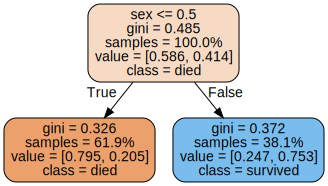

In [27]:
import graphviz

# Display decision tree
graphviz.Source(dot_data)

In [31]:
# Cross tabulation of sex and survived
crosstab = pd.crosstab(
    index=data_df.sex,
    columns=data_df.survived,
    normalize='index' # Normalize by sex
)
crosstab

survived,0,1
sex,,
female,0.246528,0.753472
male,0.794872,0.205128


In [32]:
# Get p(survived) at each leaf
p_left = crosstab.loc['male', 1]
p_right = crosstab.loc['female', 1]

# Compute Gini impurity values
i_left = 2*p_left*(1-p_left)
i_right = 2*p_right*(1-p_right)
print('Gini impurity (left leaf): {:.3f}'.format(i_left))
# Prints: 0.326
print('Gini impurity (right leaf): {:.3f}'.format(i_right))
# Prints: 0.372

Gini impurity (left leaf): 0.326
Gini impurity (right leaf): 0.372


## Deeper trees

In [33]:
# Create decision tree
dt_2 = DecisionTreeClassifier(
    criterion='gini', max_depth=2, random_state=0)

# Fit decision tree
dt_2.fit(X, y)

# Get score
dt_2.score(X, y)
# Returns: 0.81084656084656082

0.8108465608465608

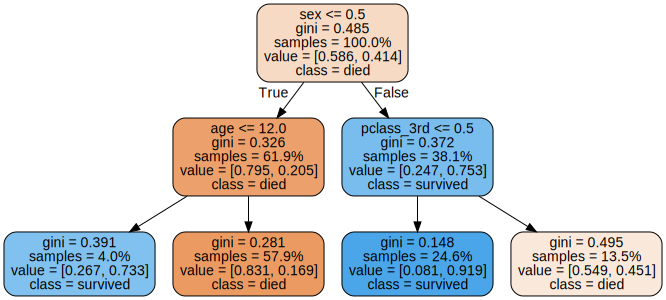

In [35]:
# Export decision tree
dot_data_2 = export_graphviz(
    dt_2, out_file=None,
    feature_names=encoded_df.drop('survived',axis=1).columns, class_names=['died', 'survived'],
    filled=True, rounded=True, proportion=True   
)

# Display it
graphviz.Source(dot_data_2)

In [39]:
from sklearn.model_selection import train_test_split

# Split into train/test sets
X_tr, X_te, y_tr, y_te = train_test_split(
    X, y, test_size=0.3, random_state=0)

# Create decision tree
dt_max_depth = DecisionTreeClassifier(
    criterion='gini', max_depth=None, random_state=0)

# Fit decision tree
dt_max_depth.fit(X_tr, y_tr)

# Get train/test scores
print('Train accuracy: {:.3f}'.format(
    dt_max_depth.score(X_tr, y_tr)))
# Prints: 0.870

print('Test accuracy: {:.3f}'.format(
    dt_max_depth.score(X_te, y_te)))
# Prints: 0.784

Train accuracy: 0.870
Test accuracy: 0.784
